In [138]:
import numpy as np
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import Layout, widgets, interact
from pymatgen.core import Lattice, Structure

In [139]:
mp_key = "jkj1S0TLmQtlvQmGDoUQvq5XQzLfKlCF"
mp_id = "mp-14437"

In [140]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    el_bs = m.get_bandstructure_by_material_id(mp_id)
    el_dos = m.get_dos_by_material_id(mp_id)
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

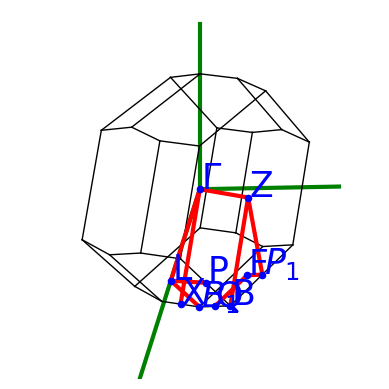

In [141]:
plot_ph = get_plot_bs(ph_bs)
plot_ph.update_yaxes(rangemode="tozero")
plot_ph.show()
bsp = PhononBSPlotter(ph_bs)

plot_brillouin_zone(ph_bs.structure)
bsp.plot_brillouin()

Seul l'interval de base de longueur 2pi/a comporte les modes indépendants dont le nombre est N(N degré de liberté). cet interval contenant les valeurs de q est la première zone de brillouin.le nombre total de vecteurs d'onde q permis dans la première zone de Brillouin est égal au nombre de mailles du cristal (N) de sorte que le nombre de modes normaux est égal au nombre de degrés de liberté du système d'atomes  (3pN).    Un  tel  cristal  présente  3  branches  de  dispersion  acoustique .
Les branches acoustiques ont une fréquence nulle au centre de la zone de Brillouin (point Gamma). Nous pouvons voir que dans le RbYO_2 les branches accoustiques sont Gamma-L, Z-Gamma, Gamma-X 

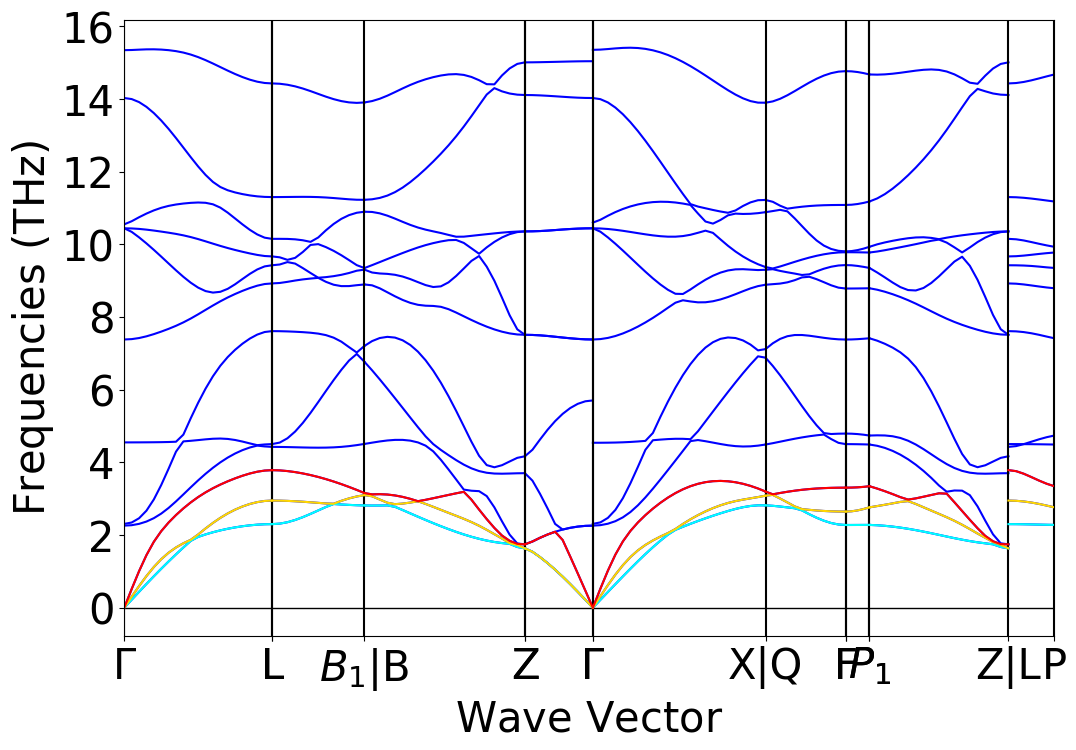

In [142]:
data = bsp.bs_plot_data()
distances = data['distances']
frequency = data['frequency']
ph_bandstructure_plot = bsp.get_plot()
# Affichage de 3 branches acoustiques différentes.
#signification des indices de frequency: [branch][qpoint][mode]
for i in range(len(distances)):
    plt.plot(distances[i], frequency[i][0], color = 'cyan')
    plt.plot(distances[i], frequency[i][1], color = 'gold')
    plt.plot(distances[i], frequency[i][2], color = 'red')



In [158]:
f_x = frequency[4][0]
f_Z = frequency[3][2]
f_L =frequency[0][1]

La vitesse de propagation de l'énergie vibratoire dans le milieu est la vitesse de groupe,(vitesse du paquet d'ondes) définie par v=dw/dq
w = 2pif donc v = 2pi* df/dq. De plus on prend la valeur absolue de la tangente à la courbe.

on calcule la vitesse du son sans oublier que les distances sont en Angstrom et les fréquences doivent être mises en hertz (de THz)

In [172]:

df_x = (f_x[1]-f_x[0])*1e12
dq_x = (distances[0][1]-distances[0][0])/1e-10
pente_cyan = df_x/dq_x

v_cyan = 2*np.pi*np.abs(pente_cyan)  
print("La vitesse de propagation du son pour la première bande acoustique dans la direction tau - X vaut",v_cyan,"m/s.\n")


La vitesse de propagation du son pour la première bande acoustique dans la direction tau - X vaut 2565.102600139406 m/s.



In [164]:
df_L = (f_L[1]-f_L[0])*1e12
dq_L = (distances[0][1]-distances[0][0])/1e-10
pente_gold = df_L/dq_L

v_gold = 2*np.pi*np.abs(pente_gold)  
print("La vitesse de propagation du son pour la deuxième bande acoustique dans la direction tau - L vaut",v_gold,"m/s.\n")



La vitesse de propagation du son pour la première bande acoustique dans la direction tau - L vaut 3574.2979674560183 m/s.



In [202]:
df_Z = (f_Z[-2]-f_Z[-1])*1e12
dq_Z = (distances[0][-2]-distances[0][-1])/1e-10
pente_red = df_Z/dq_Z

v_red = 2*np.pi*np.abs(pente_red)  
print("La vitesse de propagation du son pour la troisième bande acoustique dans la direction tau - Z vaut",v_red,"m/s.\n")


La vitesse de propagation du son pour la troisième bande acoustique dans la direction tau - Z vaut 5607.888819005717 m/s.



In [209]:
angl_x =np.arctan((f_x[1]-f_x[0])/(distances[4][1]-distances[4][0]))
freq_x =np.tan(angl_x)*(distances[4][-1]-distances[4][0])

angl_L =np.arctan((f_L[1]-f_L[0])/(distances[0][1]-distances[0][0]))
freq_L =np.tan(angl_L)*(distances[0][-1]-distances[0][0])

angl_Z =np.arctan((f_Z[-2]-f_Z[-1])/(distances[3][-1]-distances[3][-2]))
freq_Z =np.tan(angl_Z)*(distances[3][-1]-distances[3][0])


0.05419596298028928
0.4734425454504827
1.4568203396513464


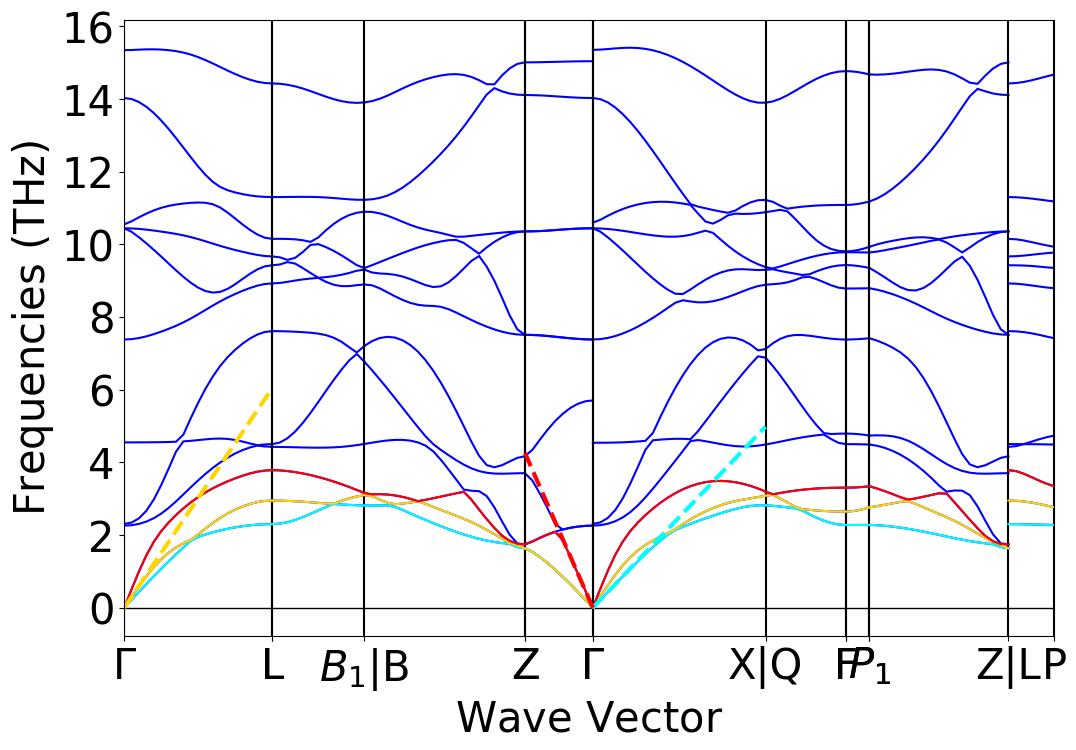

In [210]:

bsp.get_plot()
for i in range(len(distances)):
    plt.plot(distances[i], frequency[i][0], color = 'cyan')
    plt.plot(distances[i], frequency[i][1], color = 'gold')
    plt.plot(distances[i], frequency[i][2], color = 'red')

# pour la bande verte dans la direction Gamma - X 
plt.plot([distances[4][0], distances[4][-1]], 
         [f_x[0],freq_x], 
         '--', color="cyan",lw=3)

# pour la bande jaune dans la direction Gamma- L
plt.plot([distances[0][0], distances[0][-1]], 
         [f_L[0],freq_L], 
         '--', color="gold",lw=3)

# pour la bande rouge dans la direction Z -Gamma
plt.plot([distances[3][-1], distances[3][0]], 
         [f_Z[-1],freq_Z], 
         '--', color="red",lw=3)


la courbe rouge a bien une pente plus raide ce qui correspod bien a une valeur plus élevé de la vitesse du son dans cette direction. (droite son les tangente au point de départ des courbes